In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import io
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [3]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Observations:
- average tenure is 32 months
- 75% customres have tenure less than 55 months
- average montly charges are 64$
- 25% customers pay more than 89 USD per month

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0, 0.5, 'Target Variable')

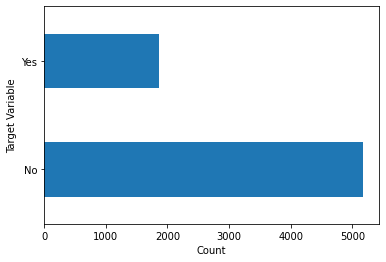

In [8]:
df['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Target Variable")

In [9]:
#calculating the percent of those who churn
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

### Observations:
- the ratio of those who churned to those who didn't si 73:27
- the data is highly unbalanced
- we need to analyse further with other features for better *insights*

# Data Cleaning

In [10]:
df_copy = df.copy()

In [11]:
# Converting total charges to numerical datatype
df_copy.TotalCharges = pd.to_numeric(df_copy.TotalCharges, errors = 'coerce')
df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df_copy['TotalCharges'].isnull().sum()

11

In [13]:
100*(11/7043)

0.1561834445548772

- since the percent of missing values is only 0.15%, we can ignore them

In [14]:
# removing the missing data
df_copy.dropna(inplace=True)

In [15]:
#segregating the customers based on their tenure
max_tenure = df_copy['tenure'].max()
max_tenure

72

In [16]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_copy['tenure_bins'] = pd.cut(df_copy.tenure, range(1, 80, 12), right=False, labels=labels)

In [17]:
df_copy['tenure_bins'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_bins, dtype: int64

In [18]:
df.drop(columns=['customerID','tenure'], axis=1, inplace=True)

# Data Exploration

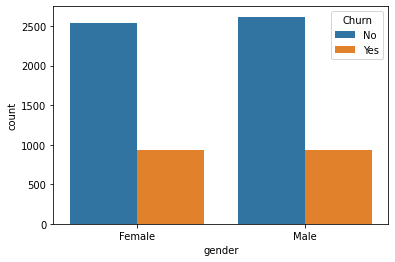

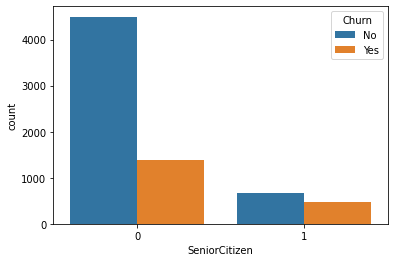

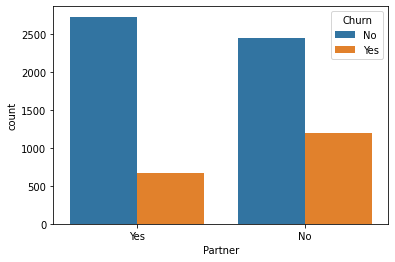

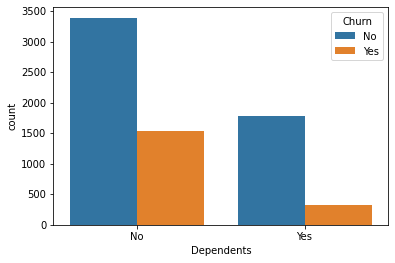

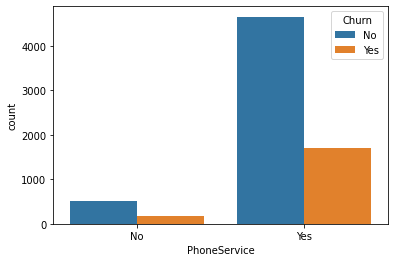

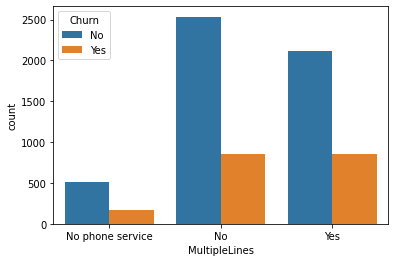

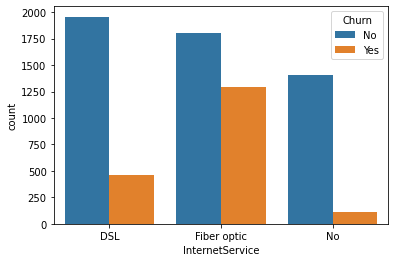

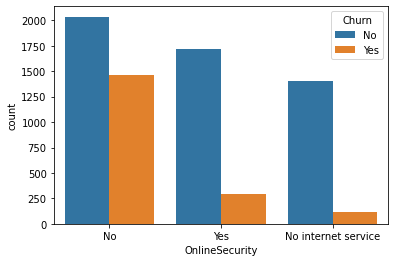

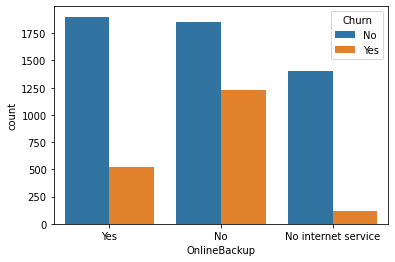

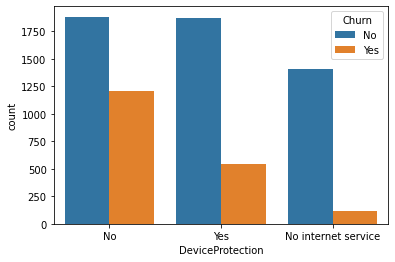

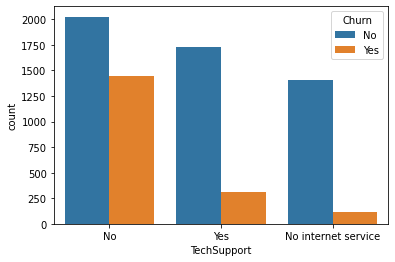

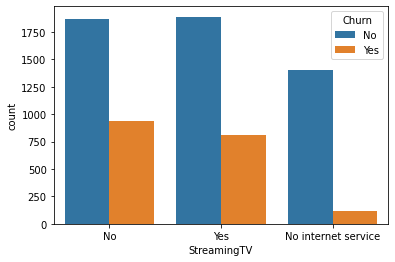

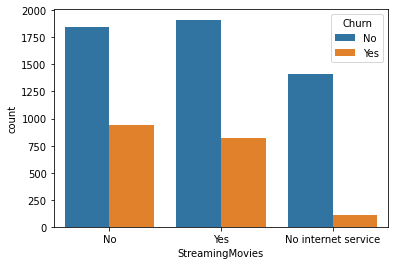

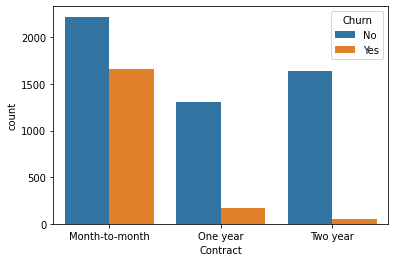

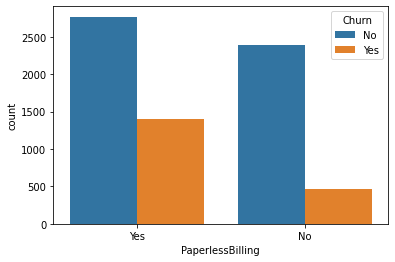

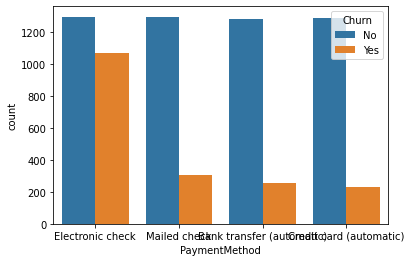

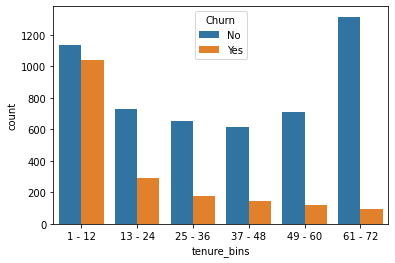

In [19]:
for i, predictor in enumerate(df_copy.drop(columns=['customerID','tenure' ,'Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_copy, x=predictor, hue='Churn')

In [20]:
# converting churn to a binary variable
df_copy['Churn'] = np.where(df_copy.Churn=='Yes',1,0)

In [21]:
# converting all categorical variables to dummy variables
df_copy = pd.get_dummies(df_copy)
df_copy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bins_1 - 12,tenure_bins_13 - 24,tenure_bins_25 - 36,tenure_bins_37 - 48,tenure_bins_49 - 60,tenure_bins_61 - 72
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


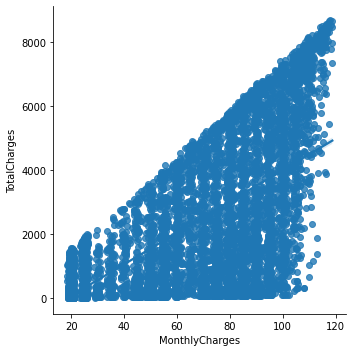

In [22]:
sns.lmplot(data=df_copy, x='MonthlyCharges', y='TotalCharges')

### Observations:
- total charges increase with increase in monthly charges

### relation between churn, monthly charges and total charges

Text(0.5, 1.0, 'Monthly charges by churn')

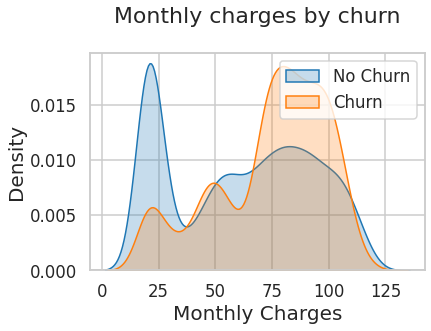

In [31]:
fig1 = sns.kdeplot(df_copy.MonthlyCharges[(df_copy["Churn"] == 0) ], fill = True)
fig1 = sns.kdeplot(df_copy.MonthlyCharges[(df_copy["Churn"] == 1) ],ax=fig1, fill= True)
fig1.legend(["No Churn","Churn"],loc='upper right')
fig1.set_ylabel('Density')
fig1.set_xlabel('Monthly Charges')
fig1.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

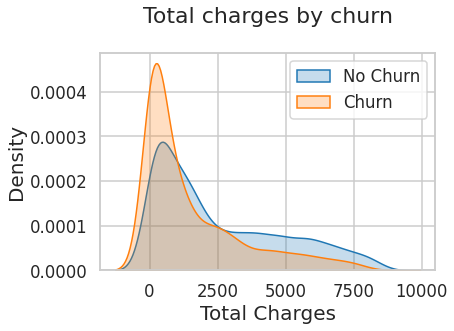

In [32]:
fig2 = sns.kdeplot(df_copy.TotalCharges[(df_copy["Churn"] == 0) ], fill = True)
fig2 = sns.kdeplot(df_copy.TotalCharges[(df_copy["Churn"] == 1) ],ax=fig2, fill= True)
fig2.legend(["No Churn","Churn"],loc='upper right')
fig2.set_ylabel('Density')
fig2.set_xlabel('Total Charges')
fig2.set_title('Total charges by churn')

### Observations:
- churn increases with increase in monthly charges
- churn decreases with increase in total charges
- low tenure, high monthly charges and lower total charges lead to high churn